In [12]:
import os
import numpy as np
import random
import csv
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from dataset import dataset
from knn import knn
from enn import enn
from kmeans import kmeans

In [13]:
def make_plots(f1_scores, loss_scores, names_list, figure_size, rotation_val):
    '''
    This function creates the boxplots shown in our submitted paper.
    '''

    f1_data = [f1_scores[i] for i in range(len(f1_scores))]
    loss_data = [loss_scores[i] for i in range(len(loss_scores))]

    positions = np.arange(len(f1_scores))
    width = 0.4

    plt.figure(figsize=figure_size)
    plt.boxplot(f1_data, positions=positions, widths=width, patch_artist=True,
                boxprops=dict(facecolor='lightblue'), medianprops=dict(color='blue'),
                whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                flierprops=dict(markerfacecolor='blue', marker='o'))
    plt.xticks(positions, names_list, rotation=rotation_val)
    plt.xlabel('Datasets')
    plt.ylabel('Average F1 Scores Across Classes')
    plt.title('Average F1 Scores Across Datasets (Higher is Better)')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=figure_size)
    plt.boxplot(loss_data, positions=positions, widths=width, patch_artist=True,
                boxprops=dict(facecolor='lightcoral'), medianprops=dict(color='red'),
                whiskerprops=dict(color='red'), capprops=dict(color='red'),
                flierprops=dict(markerfacecolor='red', marker='o'))
    plt.xticks(positions, names_list, rotation=rotation_val)
    plt.xlabel('Datasets')
    plt.ylabel('0/1 Loss Score')
    plt.title('0/1 Loss Scores Across Datasets (Lower is Better)')
    plt.tight_layout()
    plt.show()

In [14]:
def process_all(user: str, shuffle_split: bool):
    abalone_data = dataset('/home/'+user+'/CSCI_447/Project_2/Datasets/abalone.data', False)
    cancer_data = dataset('/home/'+user+'/CSCI_447/Project_2/Datasets/breast-cancer-wisconsin.data', False)
    fire_data = dataset('/home/'+user+'/CSCI_447/Project_2/Datasets/forestfires.data', False)
    glass_data = dataset('/home/'+user+'/CSCI_447/Project_2/Datasets/glass.data', False)
    machine_data = dataset('/home/'+user+'/CSCI_447/Project_2/Datasets/machine.data', False)
    soybean_data = dataset('/home/'+user+'/CSCI_447/Project_2/Datasets/soybean-small.data', False)

    abalone_data.continuize()
    abalone_data.shuffle()
    abalone_data.sort('regression')
    abalone_data.split()
    abalone_data.fold()

    cancer_data.remove_attribute()
    cancer_data.impute()
    cancer_data.shuffle()
    cancer_data.sort('classification')
    cancer_data.split()
    cancer_data.fold()

    fire_data.continuize()
    fire_data.shuffle()
    fire_data.sort('regression')
    fire_data.split()
    fire_data.fold()

    glass_data.remove_attribute()
    glass_data.shuffle()
    glass_data.sort('classification')
    glass_data.split()
    glass_data.fold()

    machine_data.continuize()
    machine_data.shuffle()
    machine_data.sort('regression')
    machine_data.split()
    machine_data.fold()

    soybean_data.continuize()
    soybean_data.shuffle()
    soybean_data.sort('classification')
    soybean_data.split()
    soybean_data.fold()

    if (shuffle_split == True) :
        abalone_data.shuffle_splits()
        cancer_data.shuffle_splits()
        fire_data.shuffle_splits()
        glass_data.shuffle_splits()
        machine_data.shuffle_splits()
        soybean_data.shuffle_splits()

    abalone_data.save('abalone')
    cancer_data.save('cancer')
    fire_data.save('fire')
    glass_data.save('glass')
    machine_data.save('machine')
    soybean_data.save('soybean')

    return abalone_data, cancer_data, fire_data, glass_data, machine_data, soybean_data

In [15]:
abalone_data, cancer_data, fire_data, glass_data, machine_data, soybean_data = process_all('carlthedog3', True)

Tuning K_c...: 100%|██████████| 15/15 [00:02<00:00,  6.41it/s]


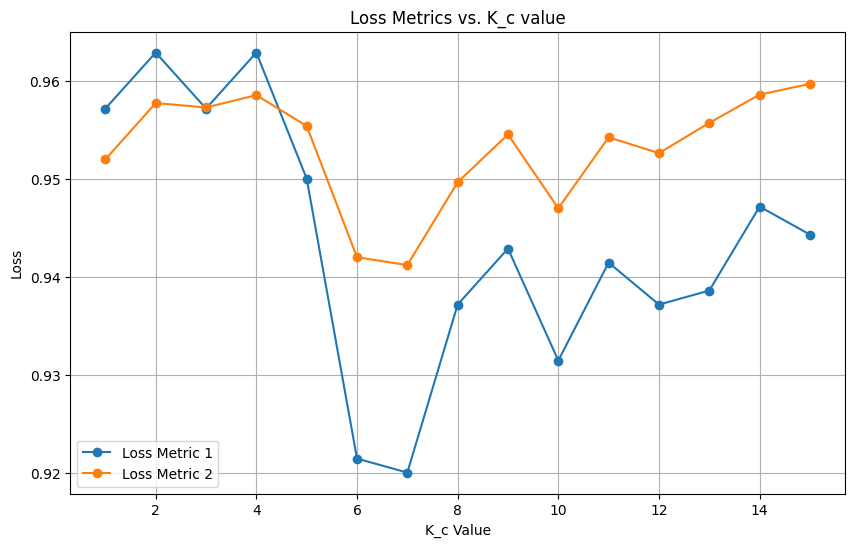

Tuning K_n...: 100%|██████████| 15/15 [00:02<00:00,  5.96it/s]


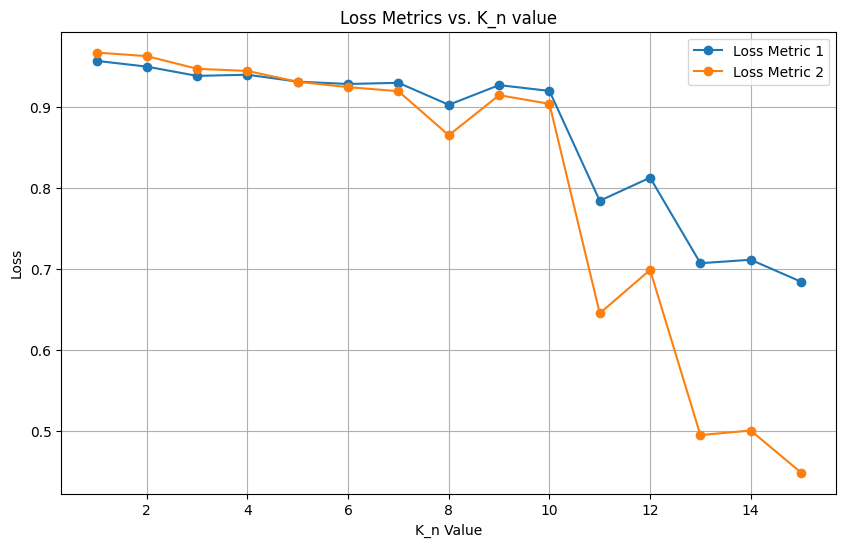

Tuned k_c: 8
Tuned k_n: 1


Tuning K_c...: 100%|██████████| 15/15 [00:01<00:00, 13.58it/s]


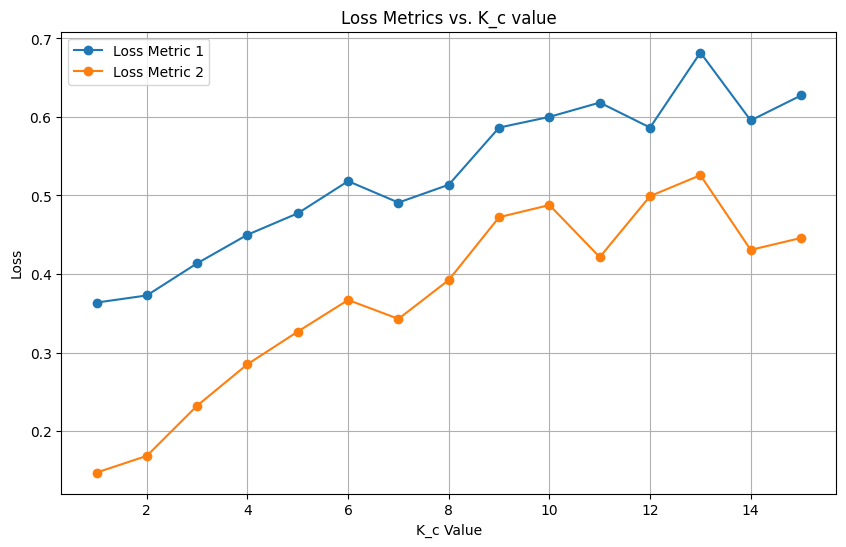

Tuning K_n...: 100%|██████████| 15/15 [00:01<00:00, 13.92it/s]


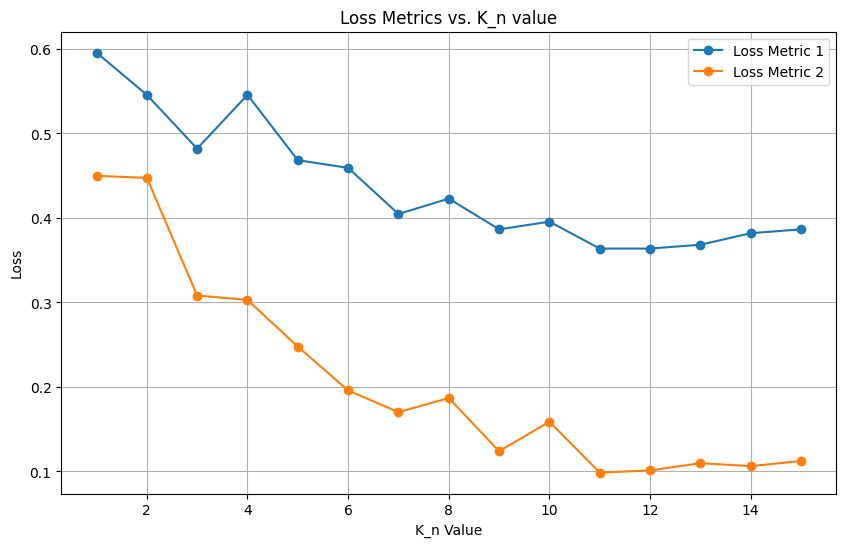

Tuned k_c: 13
Tuned k_n: 1


Tuning K_c...: 100%|██████████| 15/15 [00:00<00:00, 29.46it/s]


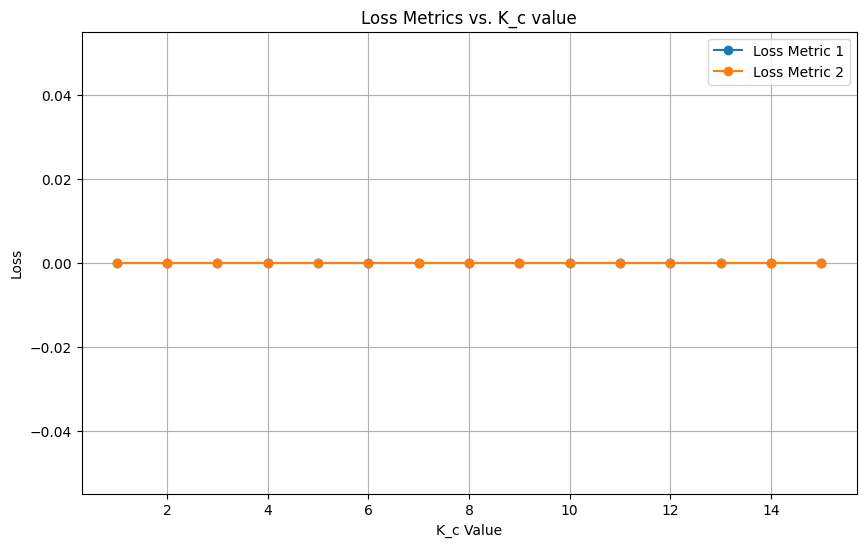

Tuning K_n...: 100%|██████████| 15/15 [00:00<00:00, 36.64it/s]


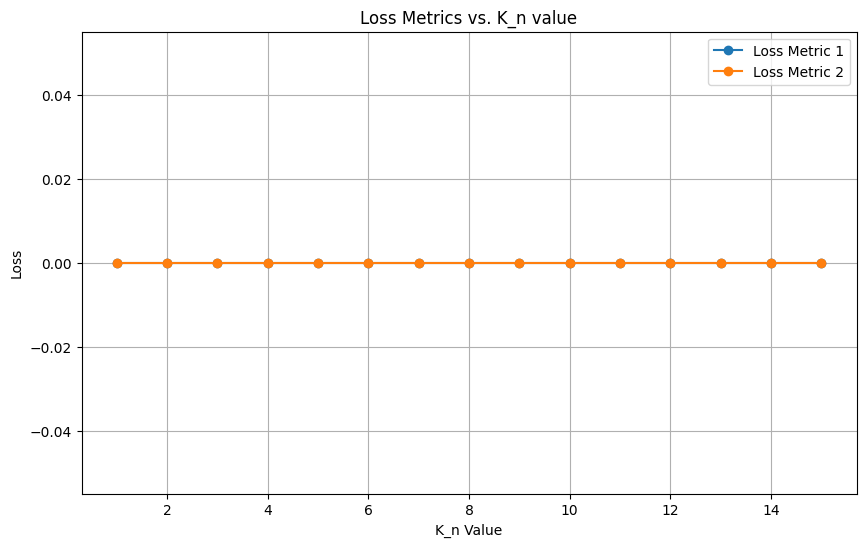

Tuned k_c: 1
Tuned k_n: 1


Tuning K_c...: 100%|██████████| 15/15 [00:10<00:00,  1.47it/s]


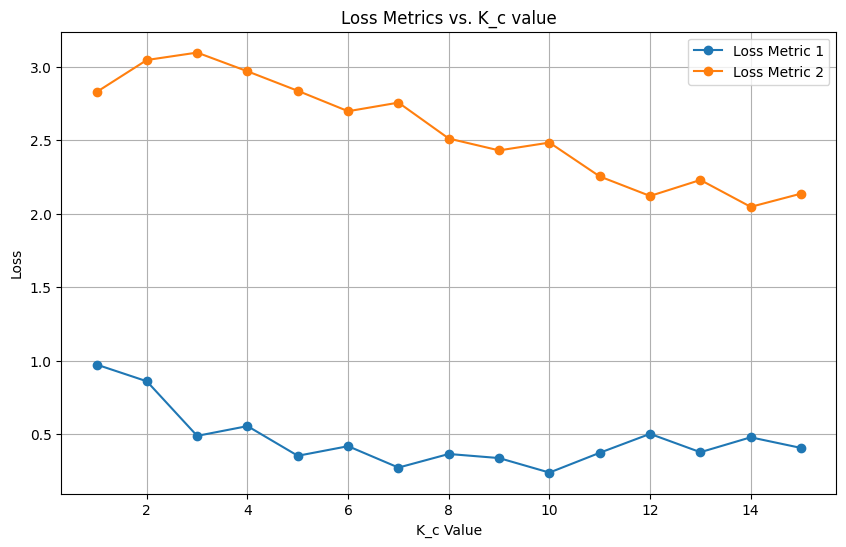

Tuning K_n...: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]


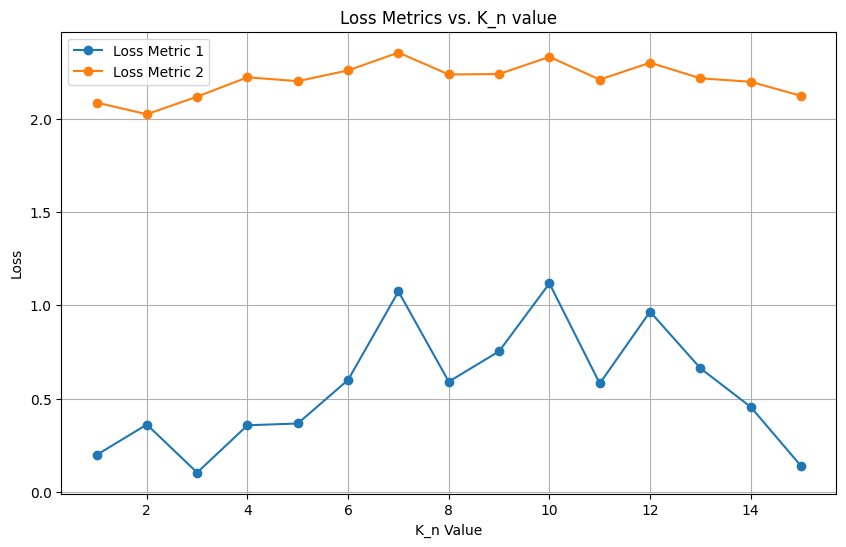

Tuning Sigma...: 100%|██████████| 15/15 [00:16<00:00,  1.11s/it]


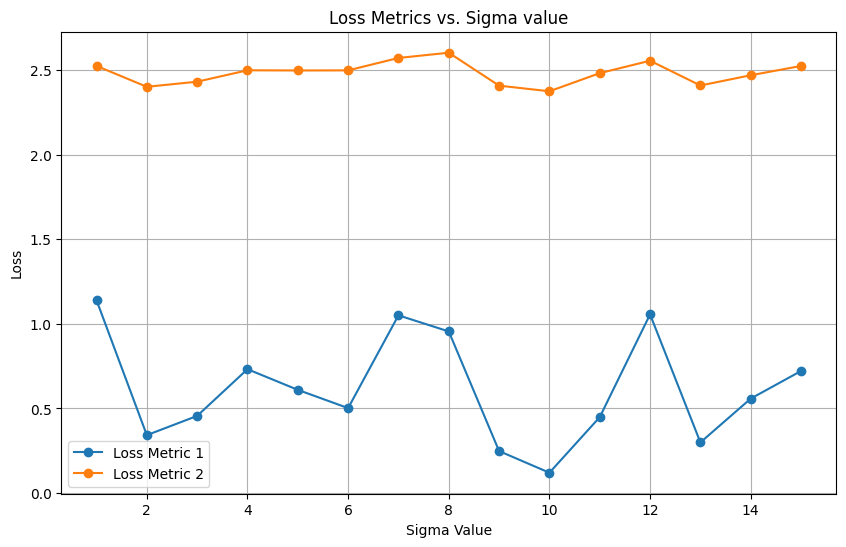

Tuned k_c: 12
Tuned k_n: 3
Tuned sigma: 10


Tuning K_c...: 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]


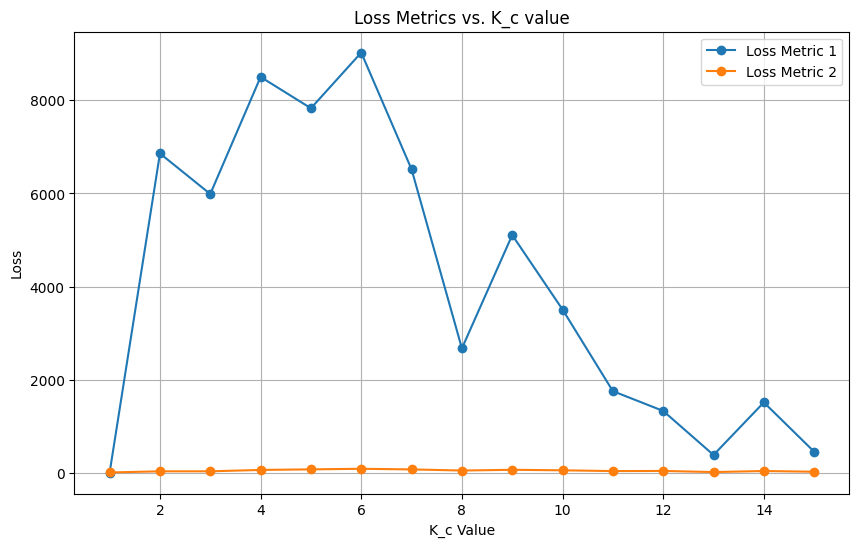

Tuning K_n...: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]


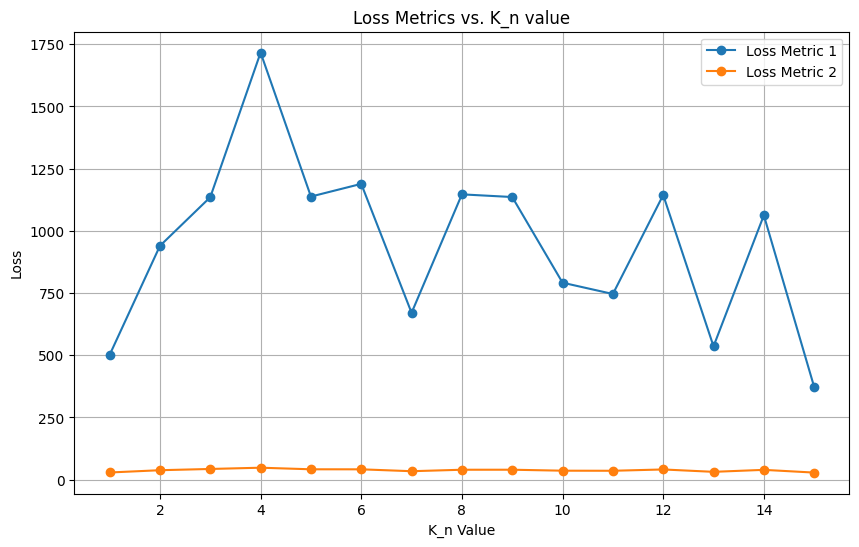

Tuning Sigma...: 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]


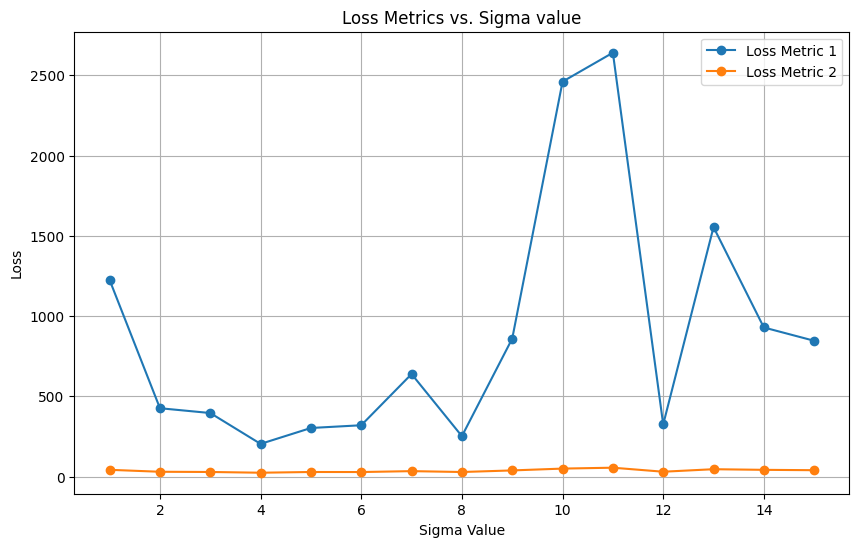

Tuned k_c: 1
Tuned k_n: 15
Tuned sigma: 4


Tuning K_c...: 100%|██████████| 15/15 [00:02<00:00,  6.73it/s]


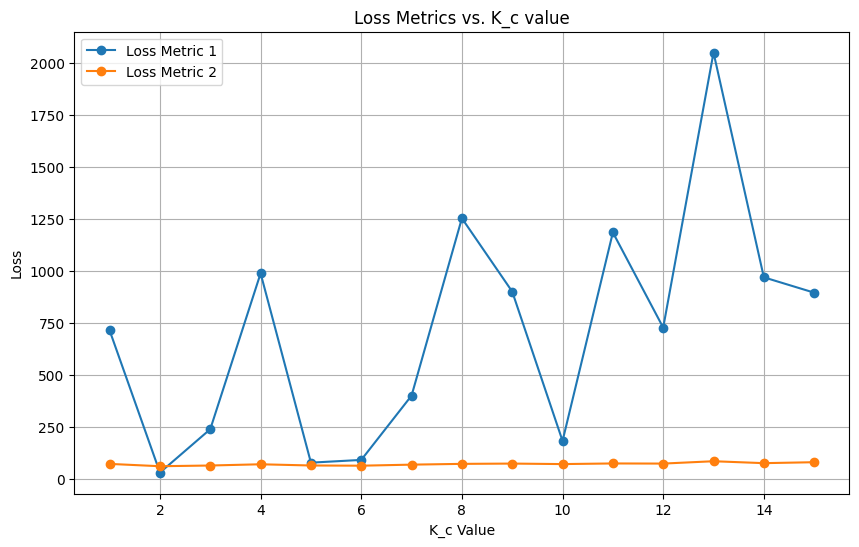

Tuning K_n...: 100%|██████████| 15/15 [00:01<00:00,  8.12it/s]


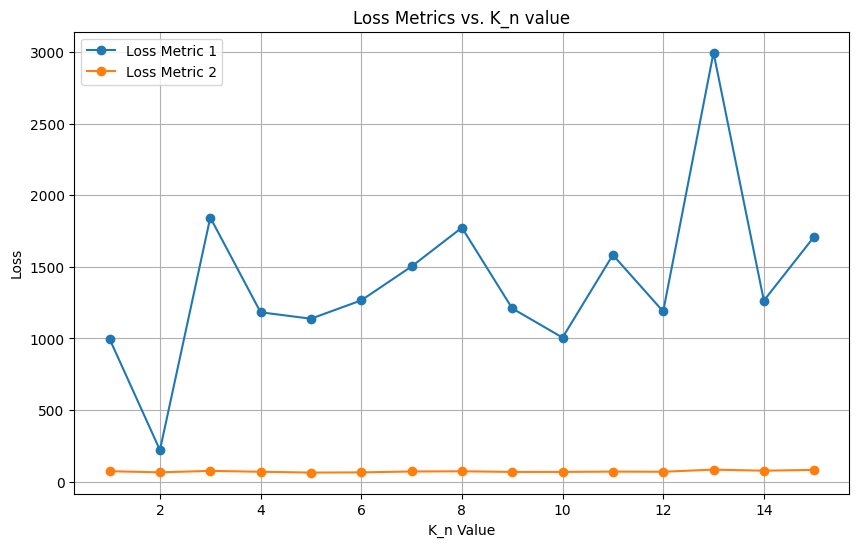

Tuning Sigma...: 100%|██████████| 15/15 [00:01<00:00,  8.14it/s]


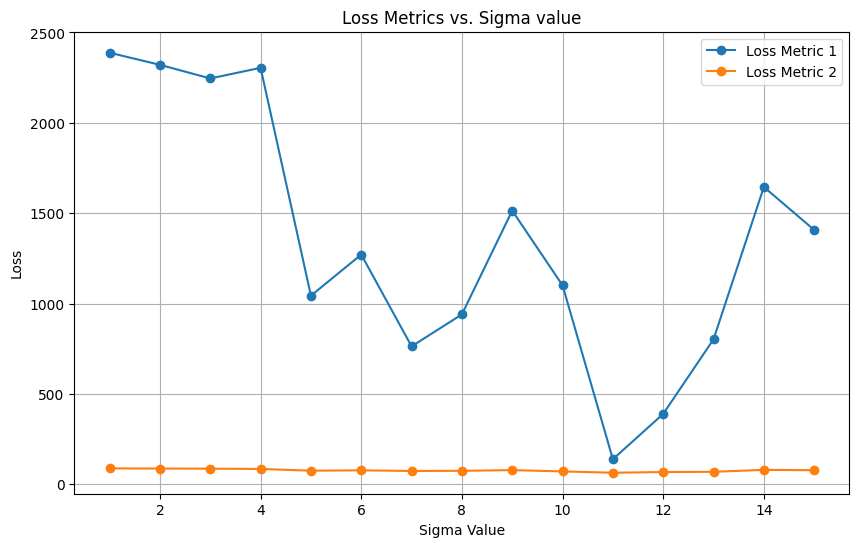

Tuned k_c: 2
Tuned k_n: 3
Tuned sigma: 11


TypeError: kmeans.classify() missing 1 required positional argument: 'tuning_flag'

In [16]:
cancer_kmeans = kmeans(cancer_data,'classification')
glass_kmeans = kmeans(glass_data,'classification')
soybean_kmeans = kmeans(soybean_data,'classification')
abalone_kmeans = kmeans(abalone_data, 'regression')
fire_kmeans = kmeans(fire_data, 'regression')
machine_kmeans = kmeans(machine_data, 'regression')

cancer_kmeans.tune()
glass_kmeans.tune()
soybean_kmeans.tune()
abalone_kmeans.tune()
fire_kmeans.tune()
machine_kmeans.tune()

cancer_kmeans.classify()
glass_kmeans.classify()
soybean_kmeans.classify()
abalone_kmeans.classify()
fire_kmeans.classify()
machine_kmeans.classify()

Tuning K_n...: 100%|██████████| 15/15 [00:35<00:00,  2.38s/it]


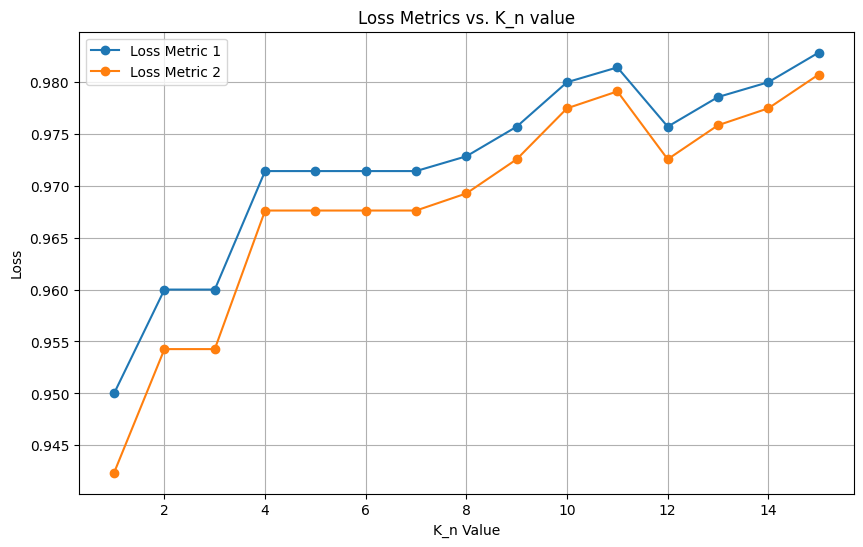

Tuned k_n: 15


Tuning K_n...: 100%|██████████| 15/15 [00:04<00:00,  3.71it/s]


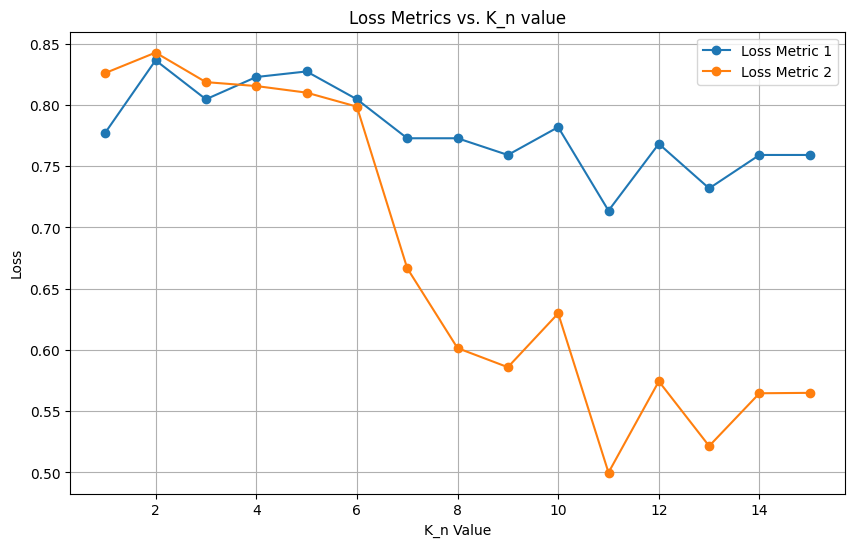

Tuned k_n: 2


Tuning K_n...: 100%|██████████| 15/15 [00:00<00:00, 24.23it/s]


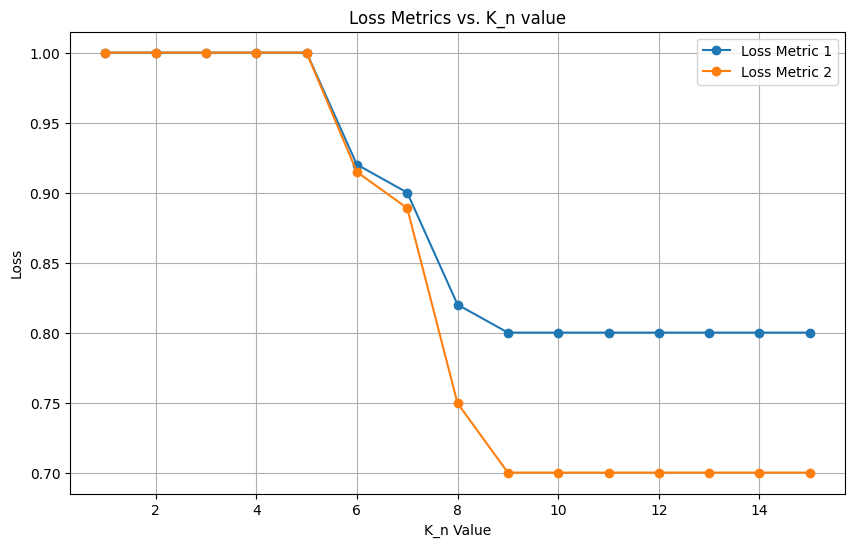

Tuned k_n: 1


Tuning K_n...: 100%|██████████| 15/15 [15:19<00:00, 61.27s/it]


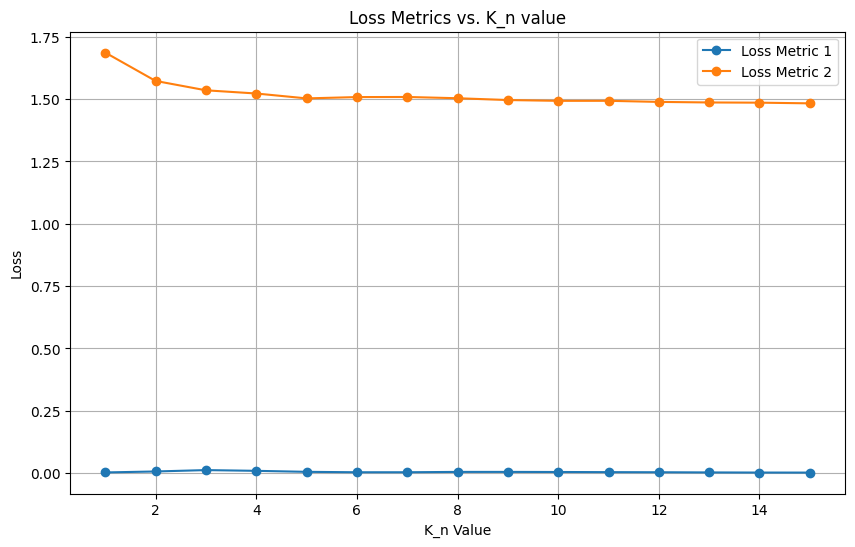

Tuning sigma...: 100%|██████████| 15/15 [15:24<00:00, 61.63s/it]


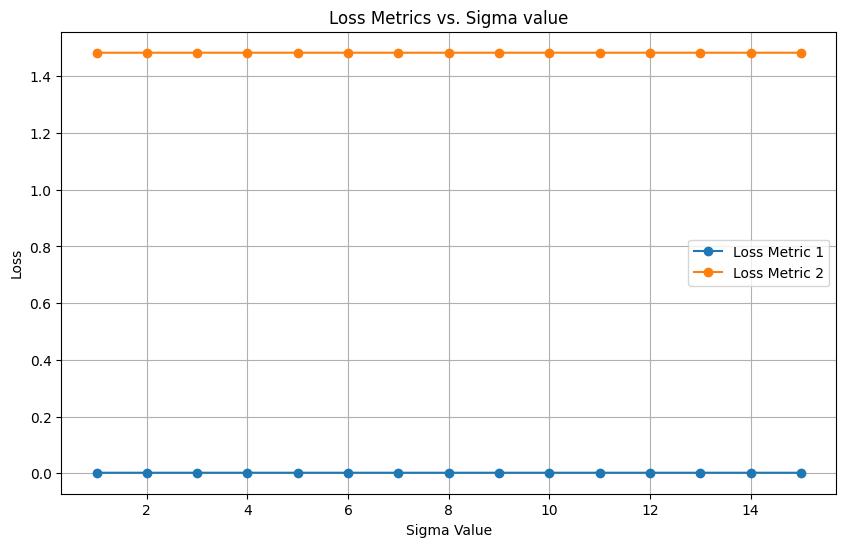

Tuned k_n: 15
Tuned sigma: 1


Tuning K_n...: 100%|██████████| 15/15 [00:17<00:00,  1.20s/it]


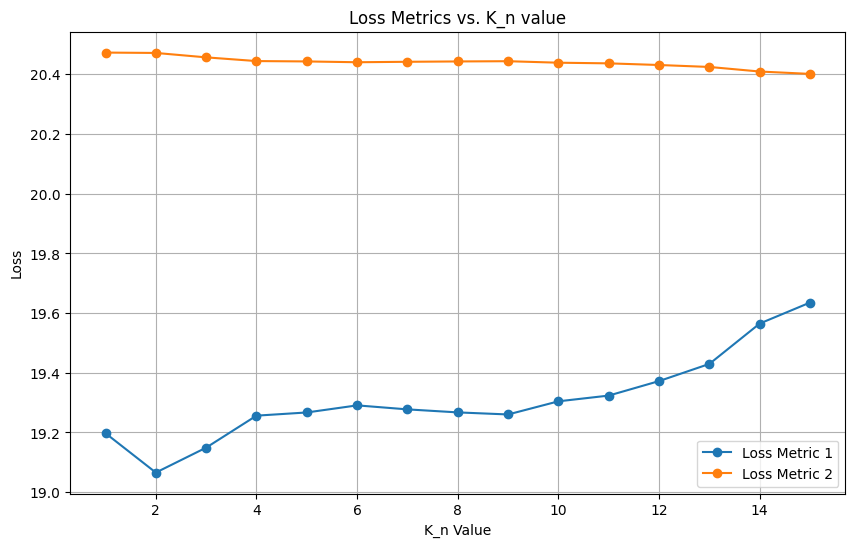

Tuning sigma...: 100%|██████████| 15/15 [00:21<00:00,  1.42s/it]


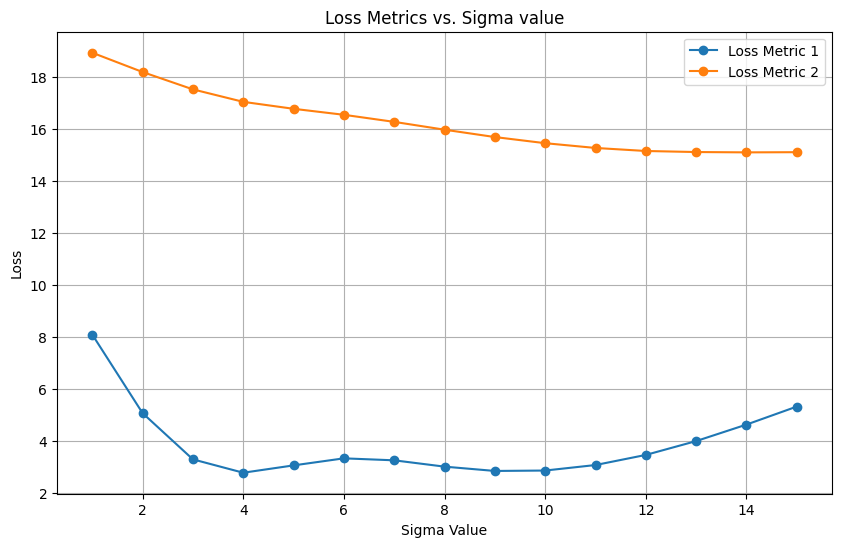

Tuned k_n: 9
Tuned sigma: 4


Tuning K_n...: 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]


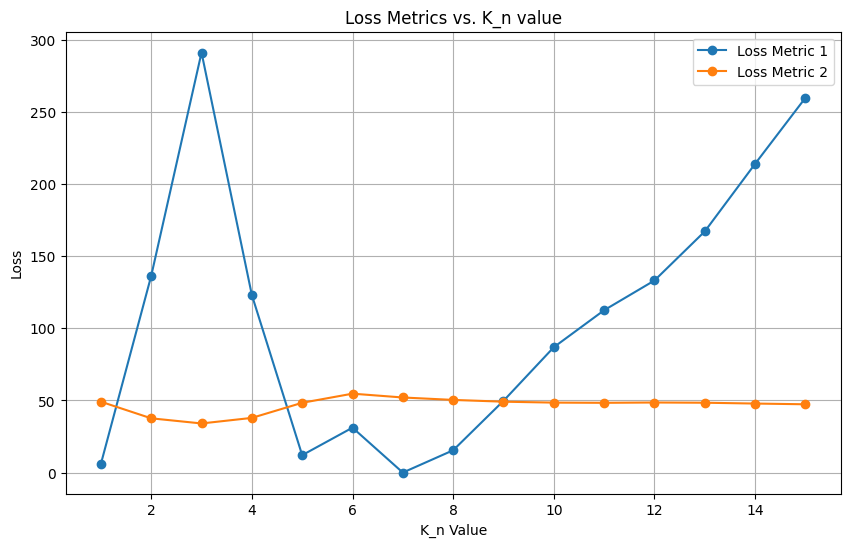

Tuning sigma...: 100%|██████████| 15/15 [00:03<00:00,  4.91it/s]


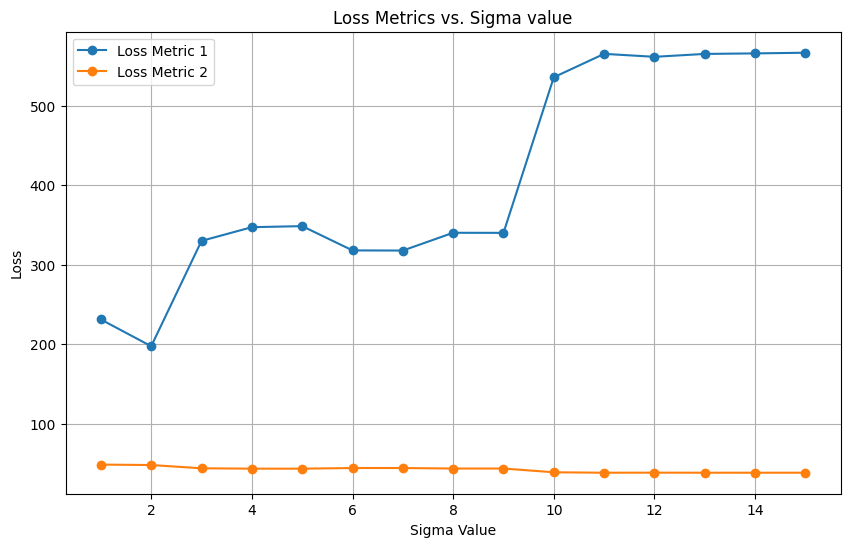

Tuned k_n: 5
Tuned sigma: 2


(10, 549, 10)


Tuning K_n...: 100%|██████████| 15/15 [00:35<00:00,  2.40s/it]


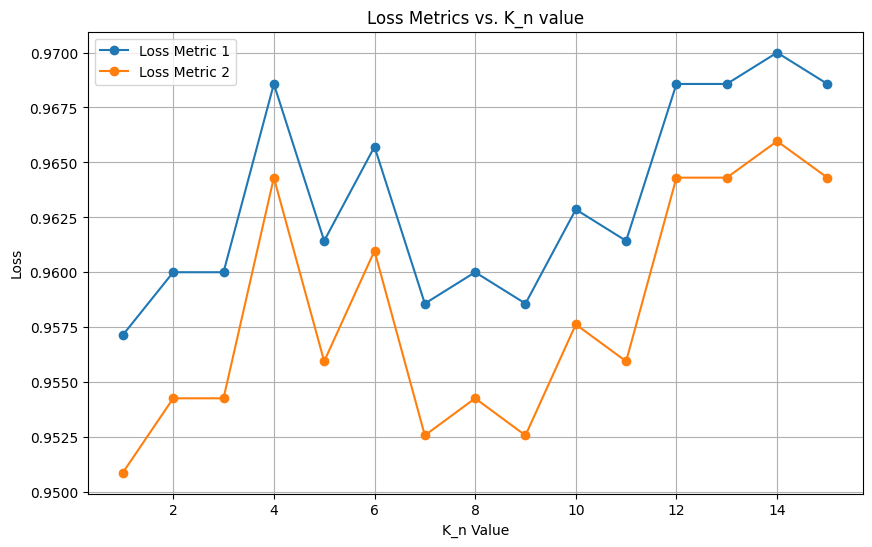

Tuned k_n: 14


(10, 134, 10)


Tuning K_n...: 100%|██████████| 15/15 [00:02<00:00,  5.13it/s]


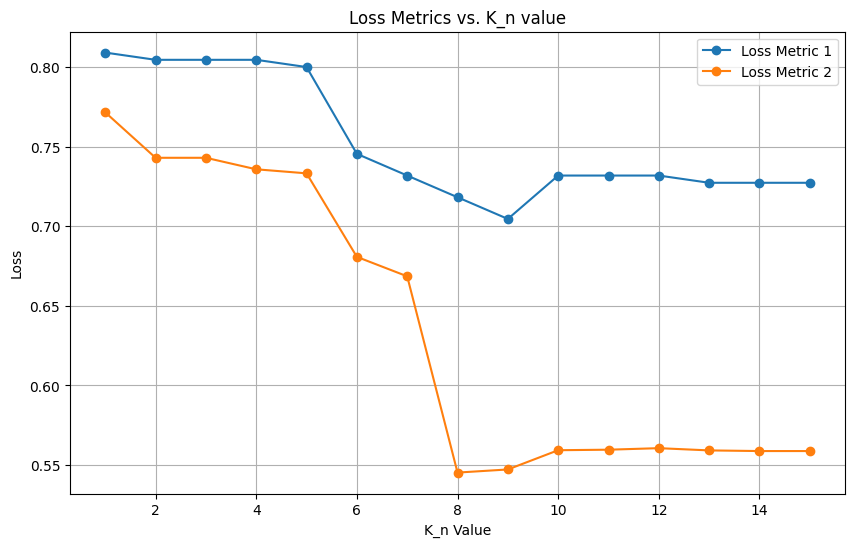

Tuned k_n: 1


(10, 45, 36)


Tuning K_n...: 100%|██████████| 15/15 [00:00<00:00, 23.75it/s]


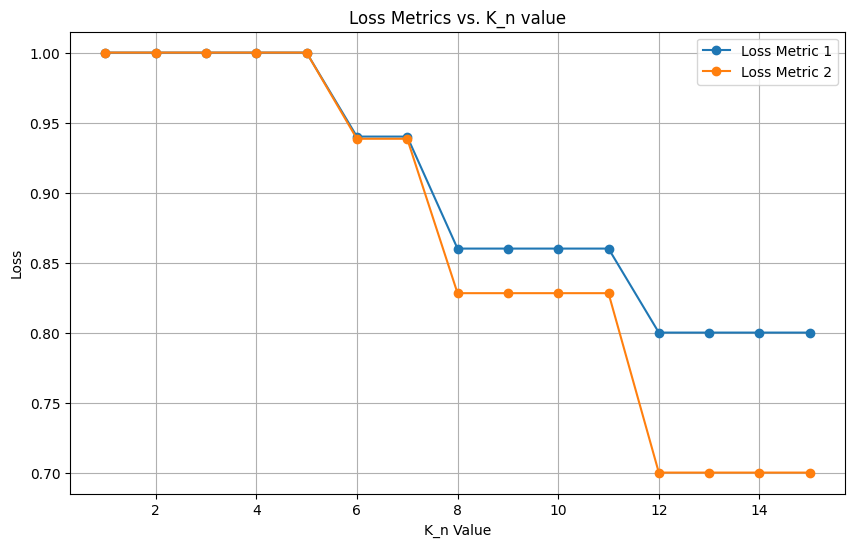

Tuned k_n: 1


(10, 813, 9)


Tuning K_n...: 100%|██████████| 15/15 [03:41<00:00, 14.76s/it]


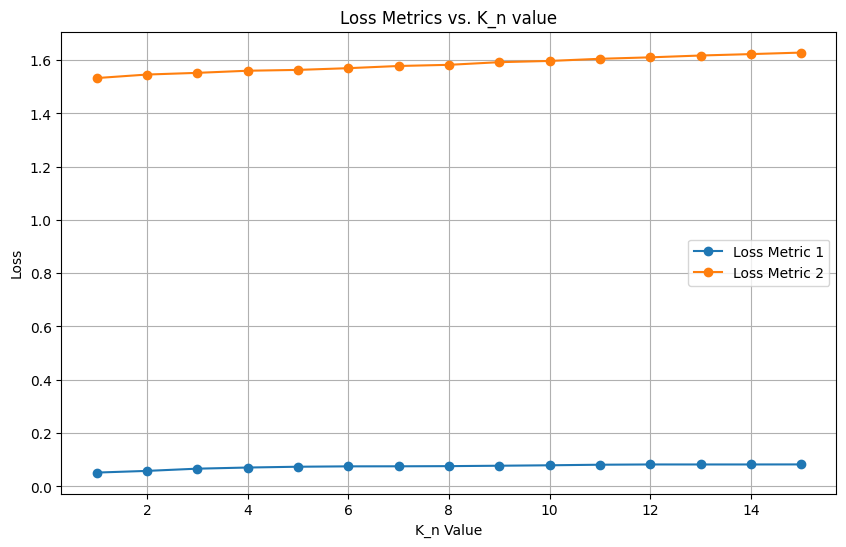

Tuning sigma...: 100%|██████████| 15/15 [03:45<00:00, 15.05s/it]


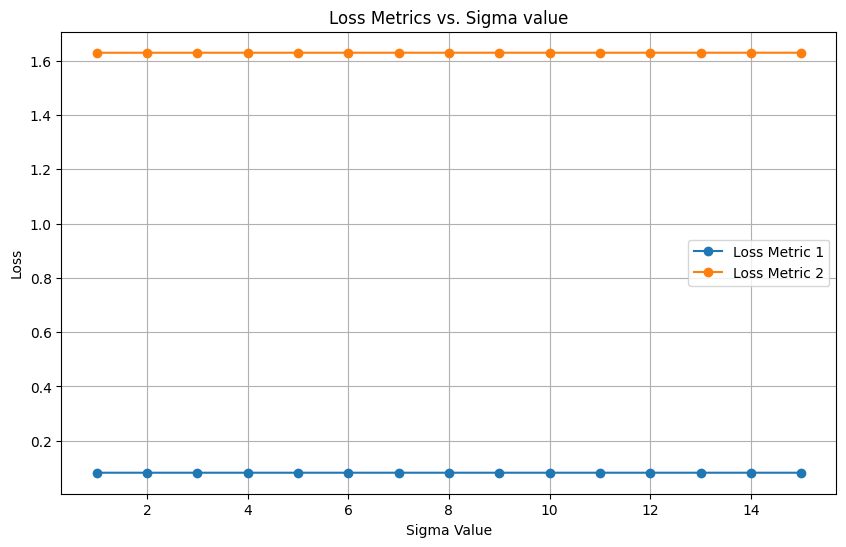

Tuned k_n: 1
Tuned sigma: 1


(10, 12, 13)


Tuning K_n...: 100%|██████████| 15/15 [00:00<00:00, 18.25it/s]


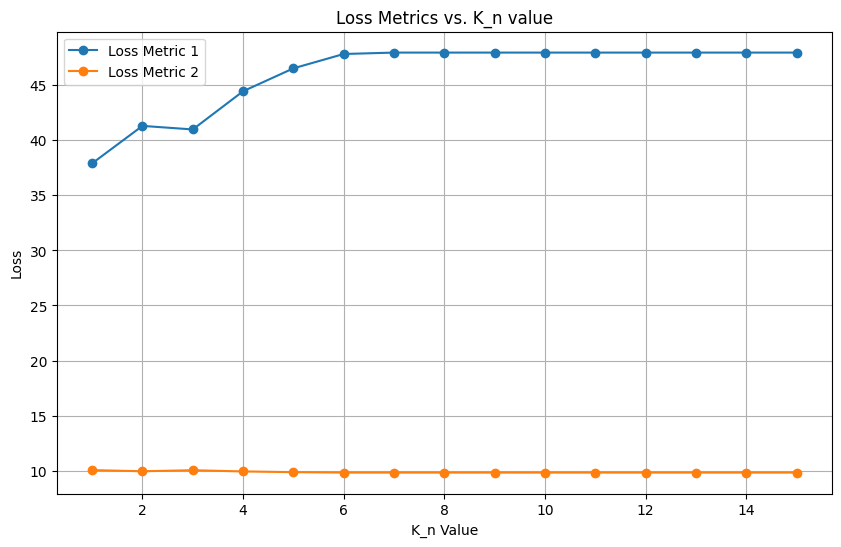

Tuning sigma...: 100%|██████████| 15/15 [00:00<00:00, 18.01it/s]


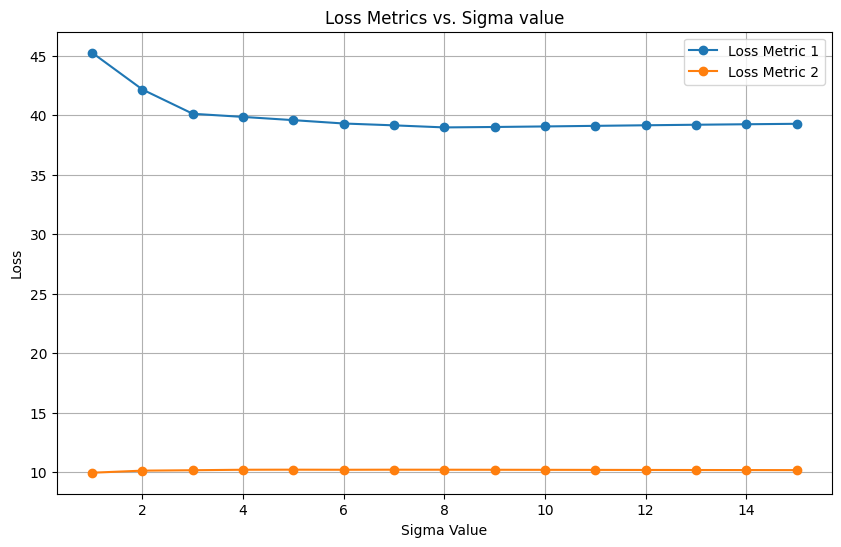

Tuned k_n: 3
Tuned sigma: 8


(10, 67, 10)


Tuning K_n...: 100%|██████████| 15/15 [00:01<00:00,  9.96it/s]


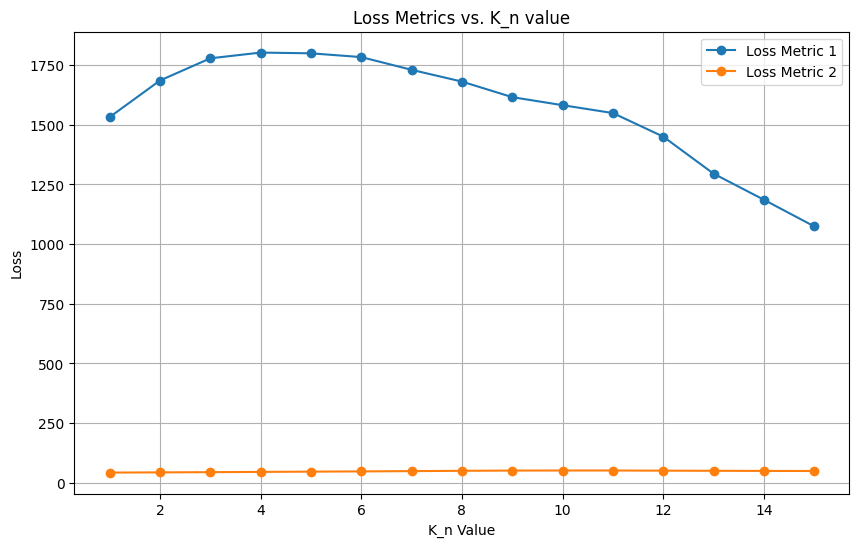

Tuning sigma...: 100%|██████████| 15/15 [00:01<00:00,  8.80it/s]


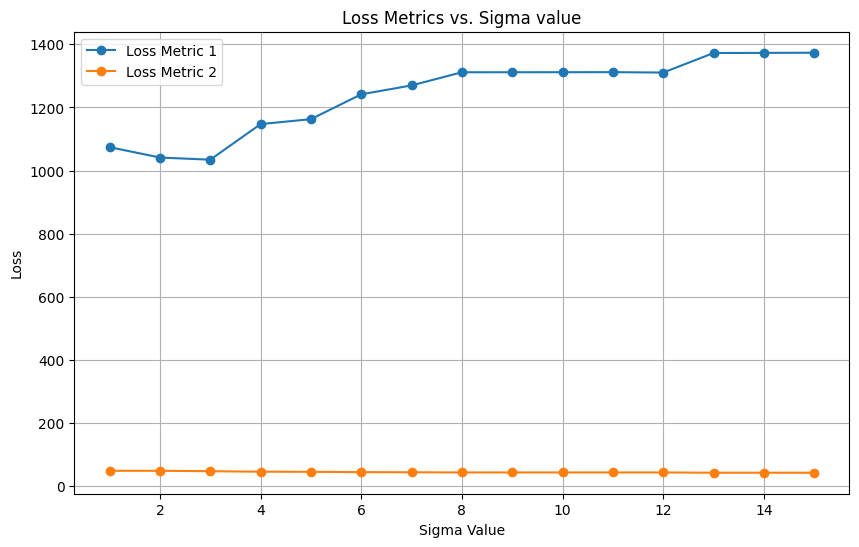

Tuned k_n: 8
Tuned sigma: 3


Cancer KNN Loss:
[0.9618441971383148, 0.957878524074198]


Cancer KNN Loss:
[0.6979166666666666, 0.6316271342738957]


Cancer KNN Loss:
[0.9761904761904762, 0.9772296015180266]


Cancer KNN Loss:
[0.023603032017260227, 1.5199894758261068]


Cancer KNN Loss:
[1.0513099396499657, 22.127040644515674]


Cancer KNN Loss:
[200.95366827295385, 36.78595908455531]


Cancer KNN Loss:
[0.9618441971383148, 0.9576002696326256]


Cancer KNN Loss:
[0.625, 0.5351567787051658]


Cancer KNN Loss:
[0.9761904761904762, 0.9772296015180266]
Cancer KNN Loss:
<bound method enn.regress of <enn.enn object at 0x7f2c66bd0940>>


Cancer KNN Loss:
[100.06795822864981, 14.04735867142931]


Cancer KNN Loss:
[1106.676404557123, 44.185728645271375]


In [3]:
cancer_knn = knn(cancer_data, 'classification')
glass_knn = knn(glass_data, "classification")
soybean_knn = knn(soybean_data, "classification")
abalone_knn = knn(abalone_data, 'regression')
fire_knn = knn(fire_data, 'regression')
machine_knn = knn(machine_data, 'regression')


cancer_knn.tune(25)
glass_knn.tune(15)
soybean_knn.tune(10)
abalone_knn.tune(5)
fire_knn.tune(15)
machine_knn.tune(10)

cancer_enn = enn(cancer_data, 'classification', k_n=cancer_knn.k_n, sigma=cancer_knn.sigma)
glass_enn = enn(glass_data, "classification", k_n=glass_knn.k_n, sigma=glass_knn.sigma)
soybean_enn = enn(soybean_data, "classification", k_n=soybean_knn.k_n, sigma=soybean_knn.sigma)
abalone_enn = enn(abalone_data, 'regression', k_n=abalone_knn.k_n, sigma=abalone_knn.sigma)
fire_enn = enn(fire_data, 'regression', k_n=fire_knn.k_n, sigma=fire_knn.sigma)
machine_enn = enn(machine_data, 'regression', k_n=machine_knn.k_n, sigma=machine_knn.sigma)

cancer_enn.tune(15)
glass_enn.tune(10)
soybean_enn.tune(10)
abalone_enn.tune(5)
fire_enn.tune(10)
machine_enn.tune(25)

cancer_knn_results = cancer_knn.classify()
glass_knn_results = glass_knn.classify()
soybean_knn_results = soybean_knn.classify()
abalone_knn_results = abalone_knn.regress()
fire_knn_results = fire_knn.regress()
machine_knn_results = machine_knn.regress()

print(f"Cancer KNN Loss:\n{}")
print(f"Glass KNN Loss:\n{}")
print(f"Soybean KNN Loss:\n{}")
print(f"Abalone KNN Loss:\n{}")
print(f"Fire KNN Loss:\n{}")
print(f"Machine KNN Loss:\n{}")

cancer_enn_results = cancer_enn.classify()
glass_enn_results = glass_enn.classify()
soybean_enn_results = soybean_enn.classify()
abalone_enn_results = abalone_enn.regress()
fire_enn_results = fire_enn.regress()
machine_enn_results = machine_enn.regress()

print(f"Cancer ENN Loss:\n{}")
print(f"Glass ENN Loss:\n{}")
print(f"Soybean ENN Loss:\n{}")
print(f"Abalone ENN Loss:\n{}")
print(f"Fire ENN Loss:\n{}")
print(f"Machine ENN Loss:\n{}")
